In [99]:
import pandas as pd
import numpy as np

In [100]:
raw_df = pd.read_csv('Original Data/brand_survey_feb.csv')

raw_df.head()

,Date & Time,Duration,NPS,"Other than Twinkl, which ONE teaching resource brand that you use comes to mind?",What other teaching resource brands that you use come to mind?,"Including any of the teaching resource brands you mentioned, which of the following brands have you heard of?",How likely or unlikely are you to consider Twinkl the next time you need resources? -,"If your favorite brand isn’t available/doesn’t offer what you need, which other brands would you consider?",What three words best describe the Twinkl brand?,Word 1,...,Career,County,Subscription Type,User,Bundle,Career.1,Career Category,Simplified Career,Country.1,County.1
0,"February 9, 2025 22:46:46",0:5:42 Hrs,8,nearpod,Teacher-pay-teacher,"Teachers Pay Teachers,Khan Academy,McGraw-Hill",Likely,Khan Academy,NaN,Varity,...,787,1797,3.0,22000858,Ultimate,Grade 6 Teacher,US Grade 6,Teacher,United States,Washington
1,"February 10, 2025 02:04:15",0:7:40 Hrs,10,Teacher pay Teacher,Teacher pay Teacher,"Teachers Pay Teachers,Scholastic,Khan Academy,McGraw-Hill,Pearson,Canva for Education",Very Likely,"Twinkl, now that I found it.",NaN,Relavent,...,784,177,3.0,25361861,Ultimate,Grade 3 Teacher,US Grade 3,Teacher,United States,Indiana
2,"February 10, 2025 05:02:15",0:45:48 Hrs,8,IMSE OG,\n,"Teachers Pay Teachers,Scholastic,Khan Academy,Education.com,McGraw-Hill,Pearson,IXL,Canva for Education",Very Unlikely,ooops...hit the wrong button on the last one...very likely :0,NaN,engaging,...,516,192,3.0,10210824,Ultimate,Special Education Teacher,sen,Teacher,United States,New Hampshire
3,"February 10, 2025 05:21:15",0:9:52 Hrs,10,TPT,TPT,"Teachers Pay Teachers,Scholastic,McGraw-Hill,Pearson",Neutral,I just google search for it,NaN,User friendly,...,31,193,NaN,22184678,Old Bundle,Kindergarten,US Kindergarten,Teacher,United States,New Jersey
4,"February 10, 2025 02:54:22",0:12:28 Hrs,9,NaN,NaN,"Teachers Pay Teachers,Scholastic,Khan Academy,Education.com,McGraw-Hill,Pearson,IXL,Canva for Education",Likely,Teachers pay teachers,NaN,Wonderful,...,30,168,3.0,25206512,Ultimate,Pre-Kindergarten,US Pre K,Teacher,United States,California


In [101]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 47 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                    --------------  -----  
 0   Date & Time                                                                                                                                               563 non-null    object 
 1   Duration                                                                                                                                                  563 non-null    object 
 2   NPS                                                                                                                                                       563 

In [102]:
questions = raw_df.columns

"""
Print with:

for idx, q in enumerate(questions):
    print(f"{idx}: {q}")
"""

'\nPrint with:\n\nfor idx, q in enumerate(questions):\n    print(f"{idx}: {q}")\n'

# Competitors List

In this section we'll extract a list of the top 10 - 20 most mentioned competitors from the survey responses.

There can be found on column indices `3` and `4`

In [103]:
competitor_mentions = raw_df.iloc[:,[3,4]].copy().reset_index(drop=True)

competitor_mentions.head()

,"Other than Twinkl, which ONE teaching resource brand that you use comes to mind?",What other teaching resource brands that you use come to mind?
0,nearpod,Teacher-pay-teacher
1,Teacher pay Teacher,Teacher pay Teacher
2,IMSE OG,\n
3,TPT,TPT
4,NaN,NaN


In [104]:
competitor_mentions.columns = ['primary', 'secondary'] + list(competitor_mentions.columns[2:])

competitor_mentions.columns

Index(['primary', 'secondary'], dtype='object')

In [105]:
print(competitor_mentions.isna().sum())

print(len(competitor_mentions))

primary       45
secondary    162
dtype: int64
563


In [106]:
melted_df = pd.melt(competitor_mentions, value_vars=['primary', 'secondary'], var_name='mention_order', value_name='competitor_mention')

print(len(melted_df))
melted_df.sample(n=8)

1126


,mention_order,competitor_mention
318,primary,WordWall
693,secondary,English created resouces
290,primary,ginger tiger
507,primary,facebook
92,primary,teachers pay teachers
1036,secondary,"Super Teacher Worksheets, Scholastic, Canva, Education.com"
652,secondary,Different blogs of educators
490,primary,teachers pay teachers


In [107]:
melted_df.dropna(subset='competitor_mention', inplace=True)

len(melted_df)

919

In [108]:
import string

def preprocess_text(text):
    if not isinstance(text, str):
        return text
        
    text = text.lower()
    text = text.translate(str.maketrans('','', string.punctuation))

    return ' '.join(text.split())

In [109]:
melted_df = melted_df.map(preprocess_text)

melted_df.head()

,mention_order,competitor_mention
0,primary,nearpod
1,primary,teacher pay teacher
2,primary,imse og
3,primary,tpt
6,primary,educationcom


In [110]:
## This was useed prir to melting df: raw_competitor_mentions = competitor_mentions['primary'].value_counts().index.sort_values()


In [111]:
canonical_names = [
    "I'm Lovin Lit",
    '3Dinosaurs',
    'ABC Kids',
    'ABCJesusLovesMe',
    'ABCMouse',
    'ARC Core',
    'Abeka',
    'AdaptedMind',
    'Adventure Academy',
    'All-in-One Homeschool',
    'Anywhere Teacher',
    'Apologia',
    'Art of Problem Solving',
    'Autism Classroom',
    'Benchmark Education',
    'Blooket',
    'Blossom and Root',
    'Boddle Learning',
    'BookCreator',
    'Boom Cards',
    'BrainPOP',
    'Bright Futures Counseling',
    'Brisk Teaching',
    'Campfire Curriculums',
    'Canva',
    'Carly and Adam',
    'Carson Dellosa Education',
    'Catholic Icing',
    'Charlotte Mason',
    'ChatGPT',
    'Christian Book',
    'Christian Ministry Deals',
    'Class Playground',
    'Classroomscreen',
    'Code.org',
    'CodeHS',
    'Common Core Sheets',
    'CommonLit',
    'Crafting Cheerfully',
    'Crafts On Sea',
    'DeltaMath',
    'Diffit',
    'Discovery Education',
    'Dreambox',
    'Duolingo',
    'ESL Brains',
    'ESL Online',
    'EasyPeasy',
    'EdPuzzle',
    'Education World',
    'Education to the Core',
    'Education.com',
    'Edukid',
    'Ellii',
    'English Central',
    'English Created Resources',
    'English Worksheets Land',
    'Epic',
    'Equipping ELLs',
    'Ereading Worksheets',
    'Etsy',
    'Evan Moor',
    'Extra Practice',
    'Facebook',
    'Flocabulary',
    'FreePrintable',
    'Functional Education',
    'Games to Learn English',
    'Gather Round',
    'Generation Genius',
    'Gentle Classical',
    'Gimkit',
    'Ginger Tiger',
    'Google',
    'Harbor and Sprout',
    'Homeschool.com',
    'Hooked on Phonics',
    'Horizons',
    'IMSE',
    'IXL',
    'Imagine Learning',
    'Itty Bitty Speech',
    'K12',
    'K5 Learning',
    'Kagan',
    'Kahoot',
    'Kami',
    'Khan Academy',
    'Kids AZ',
    'KidsKonnect',
    'Kindergarten Connection',
    'Kuta',
    'Lakeshore',
    'Learn Bright',
    'Learning AZ',
    'Legends of Learning',
    'LessonPix',
    'Lexia',
    'Linguahouse',
    'Little Bins for Little Hands',
    'Look to Him and be Radiant',
    'Lucky Little Learners',
    'Magic School',
    'Making Learning Fun',
    'Maneuvering the Middle',
    'Mashup Math',
    'Math Antics',
    'Math Worksheets 4 Kids',
    'Math-Aids.Com',
    'Math-Drills',
    'Mathseeds',
    'Miacademy',
    'Mondo Lama',
    'Montessori For Everyone',
    'Montessori Nature',
    "Mrs. Plemons' Kindergarten",
    'My Own Creations',
    'Mystery Science',
    'NRICH',
    'NSTA resources',
    'Nearpod',
    'Not So Wimpy Teacher',
    'Oriental Trading',
    'Origami Organelles',
    'Padlet',
    'Pearson',
    'Pflaum Gospel Weeklies',
    'Phonics.com',
    'Pinterest',
    'Play to Learn Preschool',
    'Pocket of Preschool',
    'Preschool Plan It',
    'Printables.com',
    'Prodigy',
    'Quiz.com',
    'Quizizz',
    'Read Theory',
    'ReadWorks',
    'Reading AZ',
    'Really Good Stuff',
    'Red Ted Art',
    'Remedia Publications',
    'Rosetta Stone',
    'SLP Now',
    'STAR Autism',
    'Scholastic',
    'SchoolAI',
    'Scribd',
    'Seesaw',
    'Simple Everyday Mom',
    'Social Studies Success',
    'Spanish Lab',
    'Spanish Learning Lab',
    'SparkleBox',
    'Sped Adulting',
    'Speech Corner',
    'Starfall Education',
    'Study Island',
    'Study.com',
    'Super Teacher Worksheets',
    'Teach This',
    'Teacher Created Materials',
    'Teacher Created Resources',
    'TeacherVision',
    'Teachers Pay Teachers',
    'Teaching Textbooks',
    'Teaching Tools',
    'Teaching with a Mountain View',
    'TeachingBooks',
    'The Autism Helper',
    'The Crafty Classroom',
    'The Good And The Beautiful',
    'The Kid Should See This',
    'The Mailbox',
    'The Math Worksheet Site',
    'The Measured Mom',
    'The OT Toolbox',
    'The Teachers Toolbox',
    'Timberdoodle',
    'TinyTap',
    'Tools To Grow',
    'Ultimate SLP',
    'We Are Teachers',
    'Whiterose',
    'WordMint',
    'Wordwall',
    'Your Therapy Source',
    'Youtube',
    'Zearn',
    'edHelper',
    'iReady',
    'iSL Collective',
    'n2y',

]


var_map = {
    'tpt' : 'Teachers Pay Teachers',
    'tptcom' : 'Teachers Pay Teachers',
    'teacherpayteacher' : 'Teachers Pay Teachers',
    'news to you' : 'n2y',
    'esl library' : 'Ellii',
    'good and beautiful' : 'The Good And The Beautiful',
    'esllibrary' : 'Ellii',
    'epiccom' : 'Epic',
    'getepiccom' : 'Epic',
    'imlovinlit' : "I'm Lovin Lit",
    'educationcom' : 'Education.com',
    'superworksheetcom' : 'Super Teacher Worksheets',
    'carsondellosa' : 'Carson Dellosa Education',
    'mia academy' : 'Miacademy',
    'tool 2 grow' : 'Tools To Grow',
    'tools 2 grow' : 'Tools To Grow',
    'easy peary': "EasyPeasy",
    'easy peasy': "EasyPeasy",

        }


In [112]:
import pandas as pd

try:
    # fuzzywuzzy is no longer maintained; rapidfuzz is a faster drop-in alternative.
    from rapidfuzz import fuzz
    from rapidfuzz import process
except ImportError:
    print("Please install rapidfuzz: pip install rapidfuzz")
    from fuzzywuzzy import fuzz
    from fuzzywuzzy import process

# --------------------------------------------------
# 2. Define helper function for text normalization
# --------------------------------------------------
def normalize_text(text: str) -> str:
    """
    Convert text to lowercase and strip punctuation
    (You can expand this with regex or advanced cleaning if needed).
    """
    return text.lower().strip()

# --------------------------------------------------
# 3. Define the labeling function
# --------------------------------------------------
def label_companies(text: str, canonical_names: list, var_map: dict, threshold: int = 80):
    if not isinstance(text, str):
        return []
    """
    1. Normalize text
    2. Split text on whitespace.
    3. Map known variations to unify synonyms (var_map).
    4. Fuzzy-match against canonical_names to catch near matches.
    5. Return all matched canonical names.
    """
    
    # 1) Normalize the text
    text_norm = normalize_text(text)
    
    # 2) Split text for scanning terms. 
    #    Then re-join after we handle direct var_map checks.
    words = text_norm.split()
    
    # 3) Attempt direct translation of known synonyms to unify them
    translated_words = []
    for w in words:
        if w in var_map:
            # Replace with mapped canonical form, e.g. "tpt" -> "teachers pay teachers"
            translated_words.append(var_map[w])
        else:
            # If we do partial checks for multi-word synonyms in var_map, you'd 
            # do it differently, e.g. scanning substring. For demonstration, 
            # we keep it simple: exact word matching in var_map.
            translated_words.append(w)
    
    # Re-join text after direct synonyms replaced
    text_mapped = " ".join(translated_words)
    
    matched_labels = set()
    
    # 4) We fuzzy-match entire text against each canonical name, 
    #    measuring similarity. If above threshold, it's considered a match.
    for name in canonical_names:
        ratio = fuzz.partial_ratio(text_mapped, name.lower())
        #ratio = fuzz.ratio(text_mapped, name.lower())
        if ratio >= threshold:
            matched_labels.add(name)
    
    return list(matched_labels)


In [121]:
melted_df["canonical_name"] = melted_df["competitor_mention"].apply(
    lambda x: label_companies(x, canonical_names, var_map, threshold=85)
)

In [122]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
melted_df

,mention_order,competitor_mention,canonical_name
0,primary,nearpod,[Nearpod]
1,primary,teacher pay teacher,[Teachers Pay Teachers]
2,primary,imse og,[IMSE]
3,primary,tpt,[Teachers Pay Teachers]
6,primary,educationcom,[Education.com]
7,primary,pencil control activities,[]
8,primary,schoolai,"[Magic School, Play to Learn Preschool, Scholastic, Pocket of Preschool, SchoolAI, All-in-One Homeschool]"
9,primary,phonics,"[Phonics.com, Hooked on Phonics]"
10,primary,mailbox,[The Mailbox]
11,primary,equipping ells,[Equipping ELLs]


In [119]:
melted_df[melted_df['competitor_mention'].str.contains('peary', na=False, case=False)]

,mention_order,competitor_mention,canonical_name
1009,secondary,easy peary,[EasyPeasy]


In [186]:
flattened_names = [name for sublist in melted_df['canonical_name'] for name in sublist]

competitor_counts_df = pd.DataFrame(flattened_names, columns=['name'])

top_20_counts = competitor_counts_df['name'].value_counts().head(20)
top_20_sorted = top_20_counts.sort_values(ascending=False)

In [187]:
import plotly.express as px

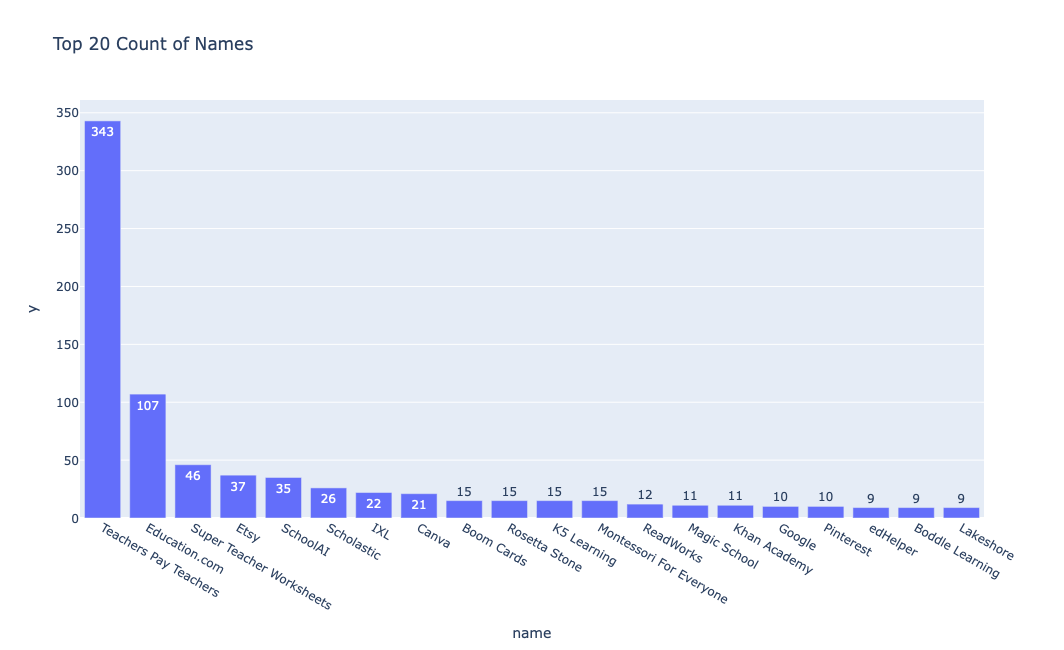

In [193]:
fig = px.bar(top_20_sorted, x=top_20_sorted.index, y=top_20_sorted.values, title='Top 20 Count of Names',
            text=top_20_sorted.values)

fig.update_layout(
    height=650,
)
fig.show()